In [17]:
# Import Meteostat library and dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Point, Daily, Hourly

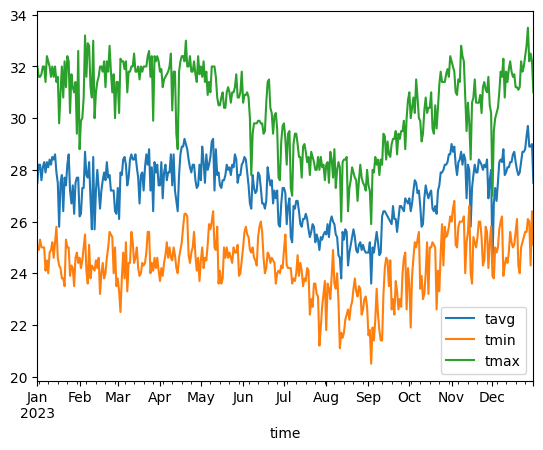

In [18]:
# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Get daily data for 2018
data = Daily(96805, start, end, )
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>